In [1]:
import gym
import gym_CliffWorld
from IPython.display import clear_output
import sys
import time
import agent as myagents
import matplotlib.pyplot as plt
from tqdm import tqdm
import collections
import utils

In [2]:
env = gym.make('cliff_world-v0')

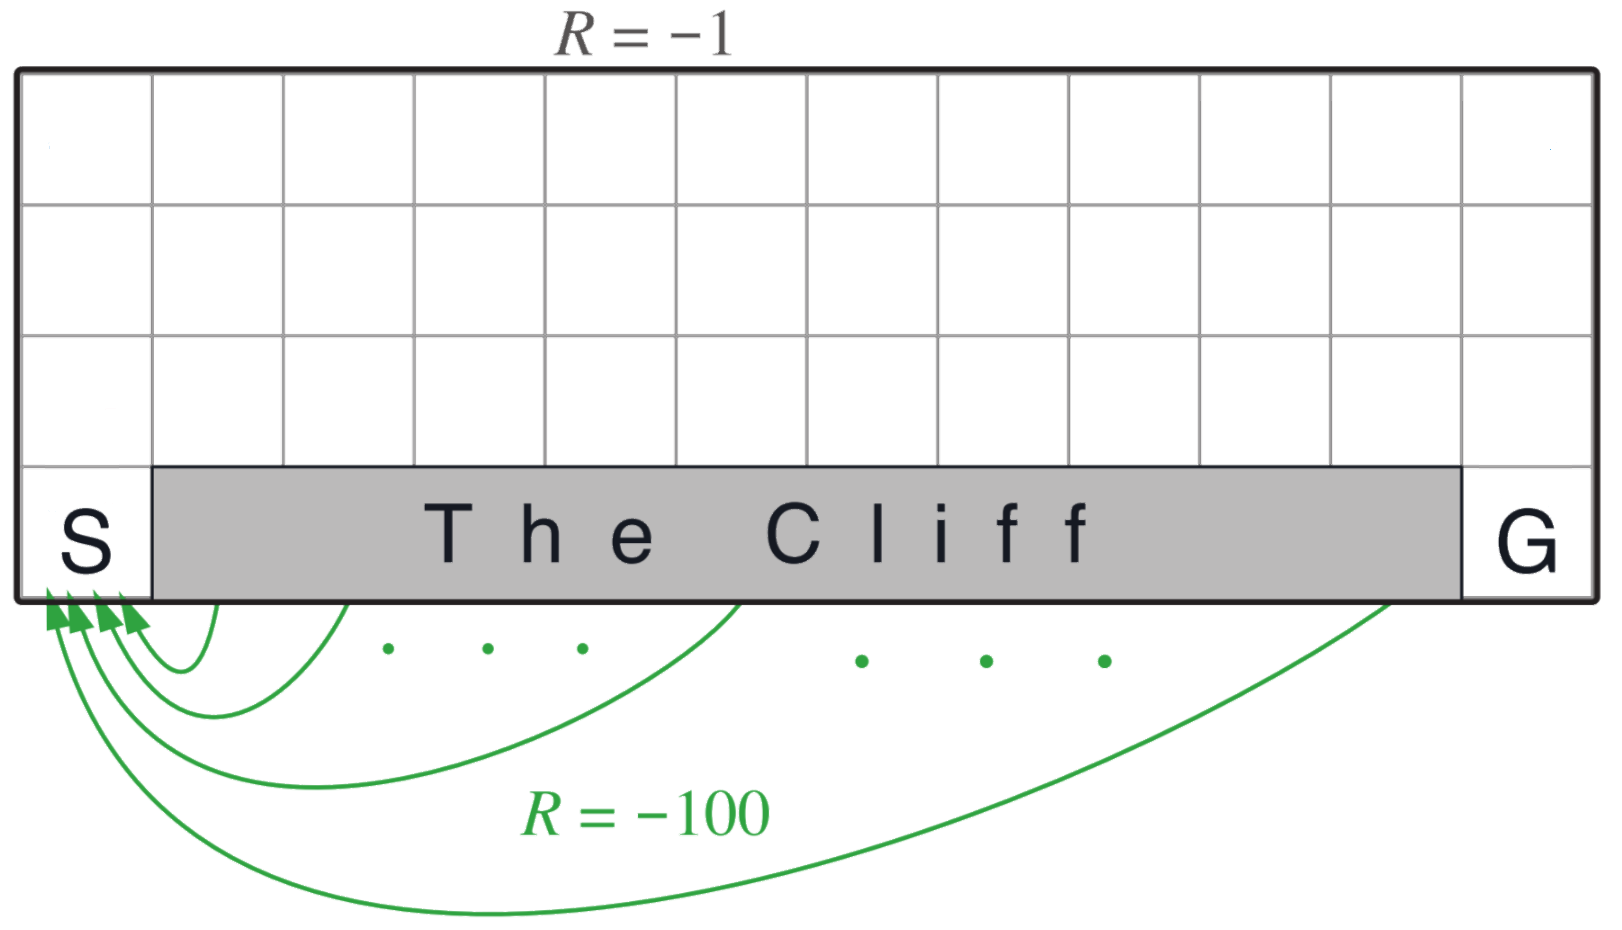

In [45]:
state_dim = (env.action_space, env.state_space)
agent_init = {
    'discount_factor': 1, 
    'learning_rate': 0.01, 
    'exploration_rate_decay': {
        'er': 1,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 0.05,
        'constant_er': False
    },
    'trace_decay': 0.9,
    'num_action': env.action_space,
    'num_state': env.state_space,
}
sarsa_agent = myagents.QLearningAgent(agent_init)

In [46]:
timesteps_per_episode = list()
rewards_per_episode = list()
n_episode = 10000
t_max_per_episode = 200
verbose = False
graphical = False
rewards_per_episode_array = np.array([])

In [47]:
for i_episode in tqdm(range(n_episode)):
    
    rewards = 0
    state = env.reset()
    next_action = sarsa_agent.episode_init(state)
    
    for t in range(t_max_per_episode):
        
        if graphical:
            clear_output(wait=True)
            env.render()
            time.sleep(0.2)
            
        
        state, reward, done, info = env.step(next_action)
        next_action = sarsa_agent.update(state, reward, done)
        
        rewards += reward
        if done:
            break
            
    timesteps_per_episode.append(t)
    rewards_per_episode.append(rewards)
    sarsa_agent.epsilon.next()

sarsa_agent.epsilon.reset_episode_count()
env.close()

100%|██████████| 10000/10000 [00:02<00:00, 3936.13it/s]


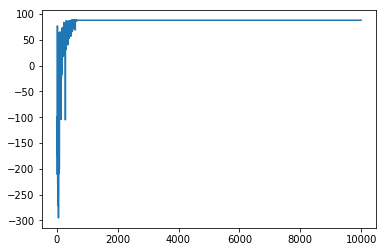

In [48]:
rewards_per_episode_array = np.concatenate([rewards_per_episode_array, np.array(rewards_per_episode)])
plt.plot(range(len(rewards_per_episode_array)), rewards_per_episode_array)

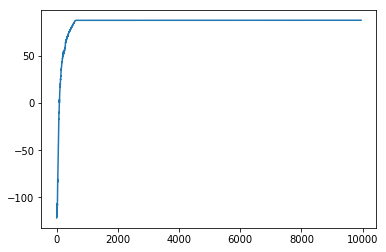

In [49]:

rewards_per_episode_rolling_mean = utils.moving_average(rewards_per_episode_array, n=50)
plt.plot(range(len(rewards_per_episode_rolling_mean)), rewards_per_episode_rolling_mean)

In [40]:
sarsa_agent.q.reshape(4, 4, 12).mean(axis=2)

array([[-0.91490669, 14.93957049, 37.82935914, 29.28081626],
       [-0.25868195,  6.11905366, 14.3809642 ,  6.53062426],
       [-0.77390742, -0.68938669, -0.398431  , -0.49977818],
       [ 7.75      , 14.94520089,  6.94360686, -0.98591397]])